## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

*Read the data first*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
customers = pd.read_csv(".\..\Ecommerce Customers")
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


*Divide independent and dependent variables seperately into x and y. We will only select numerical columns to understand normalization*

In [5]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

*Split the entire data into train and test for training and evaluation*

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

*Checking common statistics of our training features*

In [7]:
X_train.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
count,350.000000,350.000000,350.000000,350.000000
mean,33.029221,12.034586,37.081286,3.541640
std,1.003787,0.951713,0.973205,0.983835
min,30.492537,8.508152,34.476878,0.269901
25%,32.307026,11.438876,36.437212,2.910161
50%,33.077626,11.952549,37.081149,3.533975
75%,33.710028,12.674099,37.723881,4.130236
max,35.860237,14.325655,39.672591,6.401229


*Plotting one of the distribution to check normalization*

<AxesSubplot:ylabel='Frequency'>

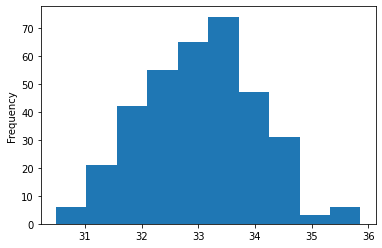

In [8]:
X_train['Avg. Session Length'].plot.hist()

*Normalizing features using sklearn*

In [9]:
from sklearn.preprocessing import Normalizer

## Create an instance of Normalizer
norm = Normalizer()

## Fit and transform on train first and then transform on test data
X_train = pd.DataFrame(norm.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(norm.transform(X_train), columns=X_test.columns)

## Checking the normalized values
X_train.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,0.629393,0.226397,0.739472,0.076089
1,0.625244,0.275505,0.726489,0.073355
2,0.647418,0.224154,0.722749,0.090769
3,0.652972,0.241270,0.716079,0.051461
4,0.637859,0.241512,0.727107,0.078250


*Plotting again to notice changes with normalization*

<AxesSubplot:ylabel='Frequency'>

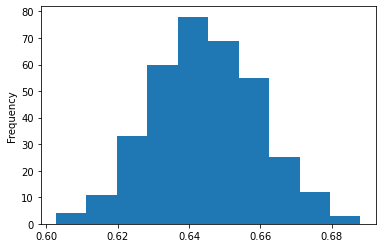

In [10]:
X_train['Avg. Session Length'].plot.hist()

###### We can notice that the data now seems to follow a normal distribution with a bell-shaped curve.
<br>
*Checking the change in common statistical values*

In [12]:
X_train.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
count,350.000000,350.000000,350.000000,350.000000
mean,0.644520,0.234839,0.723598,0.069115
std,0.014841,0.017997,0.012854,0.019176
min,0.602708,0.170289,0.684657,0.005224
25%,0.634003,0.224146,0.715256,0.057005
50%,0.644255,0.234612,0.724493,0.068953
75%,0.654934,0.247682,0.732180,0.081263
max,0.688069,0.281429,0.759373,0.123718


###################################### THE END ################################